# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [42]:
p_bowl1 = 0.5
p_bowl2 = 0.5
p_vanilla_bowl1 = 30 / 40
p_vanilla_bowl2 = 20 / 40

p_vanilla = (p_bowl1 * p_vanilla_bowl1) + (p_bowl2 * p_vanilla_bowl2)

# Bayes' theorem
p_bowl1_given_vanilla = (p_bowl1 * p_vanilla_bowl1) / p_vanilla
print(f"The probability that a vanilla cookie was taken from Bowl 1  = {p_bowl1_given_vanilla:.2f}")

The probability that a vanilla cookie was taken from Bowl 1  = 0.60


What is the probability that it came from Bowl 2?

In [43]:
p_bowl2_given_vanilla = (p_bowl2 * p_vanilla_bowl2) / p_vanilla
print(f"The probability that a vanilla cookie was taken from Bowl 2) = {p_bowl2_given_vanilla:.2f}")

The probability that a vanilla cookie was taken from Bowl 2) = 0.40


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [44]:
p_chocolate_bowl1 = 10 / 40
p_chocolate_bowl2 = 20 / 40

p_chocolate = (p_bowl1 * p_chocolate_bowl1) + (p_bowl2 * p_chocolate_bowl2)

# Bayes' theorem
p_bowl1_given_chocolate = (p_bowl1 * p_chocolate_bowl1) / p_chocolate
print(f"The probability that a chocolate cookie was taken from Bowl 1 = {p_bowl1_given_chocolate:.2f}")

p_bowl2_given_chocolate = (p_bowl2 * p_chocolate_bowl2) / p_chocolate
print(f"The probability that a chocolate cookie was taken from Bowl 2 = {p_bowl2_given_chocolate:.2f}")

The probability that a chocolate cookie was taken from Bowl 1 = 0.33
The probability that a chocolate cookie was taken from Bowl 2 = 0.67


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [45]:
# bag 1 
p_bag1 = 0.5

p_bag1_brown = 0.3
p_bag1_yellow = 0.2
p_bag1_red = 0.2
p_bag1_green = 0.1
p_bag1_orange = 0.1
p_bag1_tan = 0.1


# bag 2
p_bag2 = 0.5

p_bag2_blue = 0.24
p_bag2_green = 0.2
p_bag2_orange = 0.16
p_bag2_yellow = 0.14
p_bag2_red = 0.13
p_bag2_brown = 0.13


p_1yellow_1green = (p_bag1 * p_bag1_yellow)*(p_bag2 * p_bag2_green) + (p_bag1 * p_bag1_green)*(p_bag2 * p_bag2_yellow)
print(f"The probability of selecting a yellow candy from one bag and a green candy from another bag = {p_1yellow_1green:.4f}")

p_bag1_given_yellow = (p_bag1 * p_bag1_yellow)*(p_bag2 * p_bag2_green) / (p_1yellow_1green)
print(f"The probability that the yellow candy was taken from bag 1 = {p_bag1_given_yellow:.4f}")

The probability of selecting a yellow candy from one bag and a green candy from another bag = 0.0135
The probability that the yellow candy was taken from bag 1 = 0.7407


What is the probability that the yellow candy came from Bag 2?

In [46]:
p_bag2_given_yellow = (p_bag2 * p_bag2_yellow)*(p_bag1 * p_bag1_green) / (p_1yellow_1green)
# or p_bag2_given_yellow = 1 - p_bag1_given_yellow
print(f"The probability that the yellow candy was taken from bag 2 = {p_bag2_given_yellow:.4f}")
print(p_bag2_given_yellow + p_bag1_given_yellow) # should be 1.0

The probability that the yellow candy was taken from bag 2 = 0.2593
1.0


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [47]:
p_bag1_given_green = (p_bag1 * p_bag1_green)*(p_bag2 * p_bag2_yellow) / (p_1yellow_1green)
# or p_bag1_given_green = p_bag2_given_yellow
print(f"The probability that the green candy was taken from bag 1 = {p_bag1_given_green:.4f}")
p_bag2_given_green = (p_bag2 * p_bag2_green)*(p_bag1 * p_bag1_yellow) / (p_1yellow_1green)
# or p_bag2_given_green = 1 - p_bag1_given_green
print(f"The probability that the green candy was taken from bag 2 = {p_bag2_given_green:.4f}")
print(p_bag2_given_green + p_bag1_given_green) # should be 1.0

The probability that the green candy was taken from bag 1 = 0.2593
The probability that the green candy was taken from bag 2 = 0.7407
1.0


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [48]:
p_A = p_B = p_C = 1/3
p_openB_carA = 0.5
p_openB_carB = 0
p_openB_carC = 1
p_openB = p_A * p_openB_carA + p_B * p_openB_carB + p_C * p_openB_carC
p_openB_carA_given_openB = p_A * p_openB_carA / p_openB
p_openB_carB_given_openB = p_B * p_openB_carB / p_openB
p_openB_carC_given_openB = p_C * p_openB_carC / p_openB
print(f"p_openB = {p_openB}")
print(f"The probability of car being behind the door A given that door B is opend = {p_openB_carA_given_openB}")
print(f"The probability of car being behind the door B given that door B is opend = {p_openB_carB_given_openB}")
print(f"The probability of car being behind the door C given that door B is opend = {p_openB_carC_given_openB}")

p_openB = 0.5
The probability of car being behind the door A given that door B is opend = 0.3333333333333333
The probability of car being behind the door B given that door B is opend = 0.0
The probability of car being behind the door C given that door B is opend = 0.6666666666666666


# Bonus: Advanced Bayesian Challenge

## 1. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

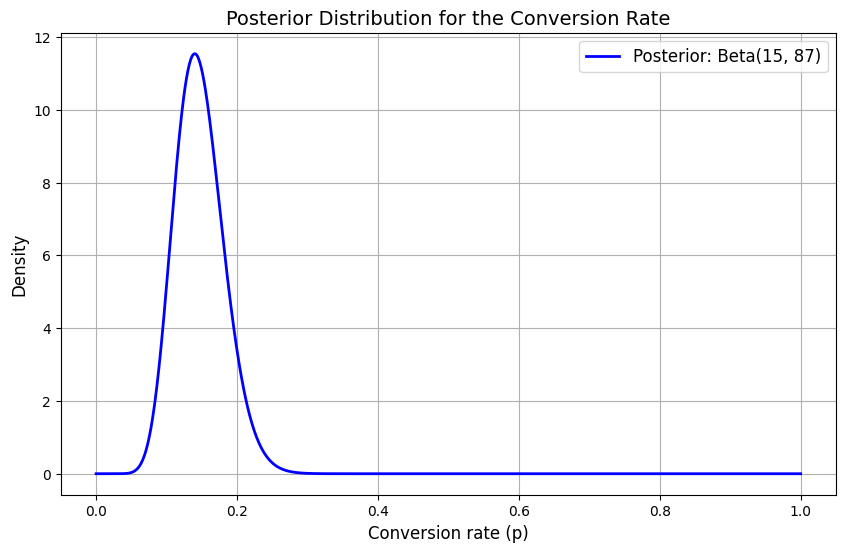

In [49]:
# Observed data
n = 100        # Total number of visitors
x = 14         # Number of sign-ups

# Prior parameters (uniform prior Beta(1,1))
alpha_prior = 1
beta_prior  = 1

# Posterior parameters
alpha_post = alpha_prior + x       # 1 + 14 = 15
beta_post  = beta_prior  + n - x     # 1 + 86 = 87

# Generate points between 0 and 1 for plotting
p_values = np.linspace(0, 1, 1000)
posterior_pdf = beta.pdf(p_values, alpha_post, beta_post)

# Plotting the posterior distribution PDF
plt.figure(figsize=(10, 6))
plt.plot(p_values, posterior_pdf, 
         label=f'Posterior: Beta({alpha_post}, {beta_post})', lw=2, color='blue')
plt.xlabel('Conversion rate (p)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Posterior Distribution for the Conversion Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Produce a set of descriptive statistics for the posterior distribution.

Posterior Beta Distribution: Beta(15, 87)
Mean: 0.1471
Variance: 0.001218
Standard Deviation: 0.0349
Mode: 0.1400
Median: 0.1447
95% Credible Interval: (0.0856, 0.2216)


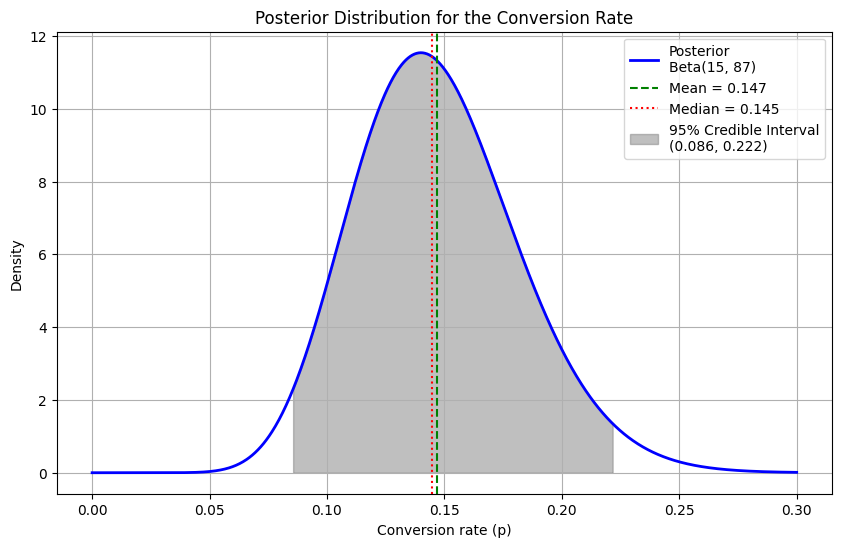

In [50]:
mean_val = alpha_post / (alpha_post + beta_post)
var_val = (alpha_post * beta_post) / ((alpha_post + beta_post)**2 * (alpha_post + beta_post + 1))
std_val = np.sqrt(var_val)
mode_val = (alpha_post - 1) / (alpha_post + beta_post - 2) if (alpha_post > 1 and beta_post > 1) else np.nan
median_val = beta.ppf(0.5, alpha_post, beta_post)
cred_lower, cred_upper = beta.ppf([0.025, 0.975], alpha_post, beta_post)

# Print descriptive statistics
print("Posterior Beta Distribution: Beta(15, 87)")
print(f"Mean: {mean_val:.4f}")
print(f"Variance: {var_val:.6f}")
print(f"Standard Deviation: {std_val:.4f}")
print(f"Mode: {mode_val:.4f}")
print(f"Median: {median_val:.4f}")
print(f"95% Credible Interval: ({cred_lower:.4f}, {cred_upper:.4f})")

# Visualization
p_values = np.linspace(0, 0.3, 1000)  # Adjust the range for better visibility
posterior_pdf = beta.pdf(p_values, alpha_post, beta_post)

plt.figure(figsize=(10, 6))
plt.plot(p_values, posterior_pdf, label=f"Posterior\nBeta({alpha_post}, {beta_post})", lw=2, color='blue')
plt.axvline(mean_val, color='green', linestyle='--', label=f"Mean = {mean_val:.3f}")
plt.axvline(median_val, color='red', linestyle=':', label=f"Median = {median_val:.3f}")
plt.fill_between(p_values, posterior_pdf, where=(p_values >= cred_lower) & (p_values <= cred_upper),
                 color='gray', alpha=0.5, label=f"95% Credible Interval\n({cred_lower:.3f}, {cred_upper:.3f})")
plt.xlabel("Conversion rate (p)")
plt.ylabel("Density")
plt.title("Posterior Distribution for the Conversion Rate")
plt.legend()
plt.grid(True)
plt.show()


What is the 90% credible interval range?

In [51]:
# Compute the 5th and 95th percentiles
cred_lower_90 = beta.ppf(0.05, alpha_post, beta_post)
cred_upper_90 = beta.ppf(0.95, alpha_post, beta_post)

print("90% credible interval: [{:.4f}, {:.4f}]".format(cred_lower_90, cred_upper_90))


90% credible interval: [0.0938, 0.2082]


What is the Maximum Likelihood Estimate?

In [52]:
mle = x / n

print("The Maximum Likelihood Estimate for the conversion rate p is:", mle)


The Maximum Likelihood Estimate for the conversion rate p is: 0.14
